In [17]:
from exact_diag import form_basis, periodic_ham_1, periodic_ham_2, periodic_ham_3, find_nk, find_skz, ham_op_2
import matplotlib.pyplot as plt
import numpy as np
periodic_ham = periodic_ham_3

In [18]:
l = 4
k_peri = np.pi*np.arange(-2*l, 2*l, 2)/(2*l)
k_anti = np.pi*np.arange(-2*l+1, 2*l, 2)/(2*l)
k_pos = k_anti[l:]
print(k_peri)
print(k_anti)
print(k_pos)
Gc = 1./np.sum(k_pos)
print(Gc)

[-3.14159265 -2.35619449 -1.57079633 -0.78539816  0.          0.78539816
  1.57079633  2.35619449]
[-2.74889357 -1.96349541 -1.17809725 -0.39269908  0.39269908  1.17809725
  1.96349541  2.74889357]
[0.39269908 1.17809725 1.96349541 2.74889357]
0.15915494309189535


# $\rho = 0.5$ (quarter filling)

In [19]:
Nup = l//2
print('Nup')
print(Nup)
# Ndown = 6
basis = form_basis(2*l, Nup, Nup)
basis_plus = form_basis(2*l, Nup+1, Nup+1)
basis_minus = form_basis(2*l, Nup-1, Nup-1)
bases = [basis, basis_plus, basis_minus]
Gr = .7
Ghr = Gr/(2*Gr-1)
print('Gs')
print(Gr)
print(Ghr)
# Ghr = 2
Gs = [Gr*Gc, Ghr*Gc]
es_peri = np.zeros((2, 3))
es_anti = np.zeros((2, 3))
Grs = []
for i, G in enumerate(Gs):
    Gr = np.round(G/Gc, 1)
    Grs += [Gr]
    for j, b in enumerate(bases):
        print('How many states?')
        print(b.Ns)
        h_peri = periodic_ham(l, G, b)
        h_anti = ham_op_2(l, G, k_pos, b)
        ep, _ = h_peri.eigsh(k=10, which='SA')
        ea, _ = h_anti.eigsh(k=10, which='SA')
        es_peri[i,j] = min(ep)
        es_anti[i,j] = min(ea)

Nup
2
Gs
0.7
1.7500000000000002
How many states?
784
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
3136
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
64
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
784
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
3136
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Ho

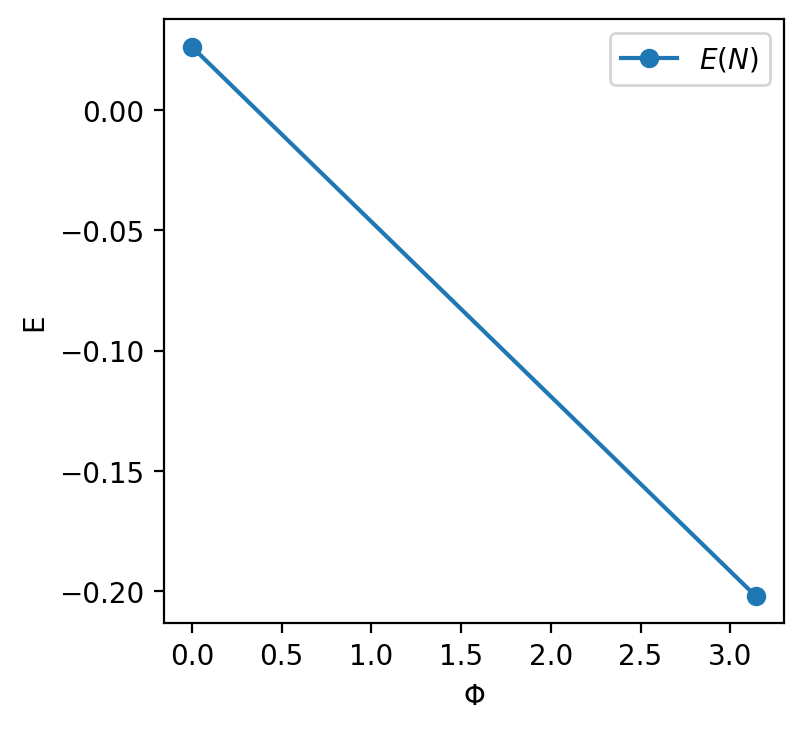

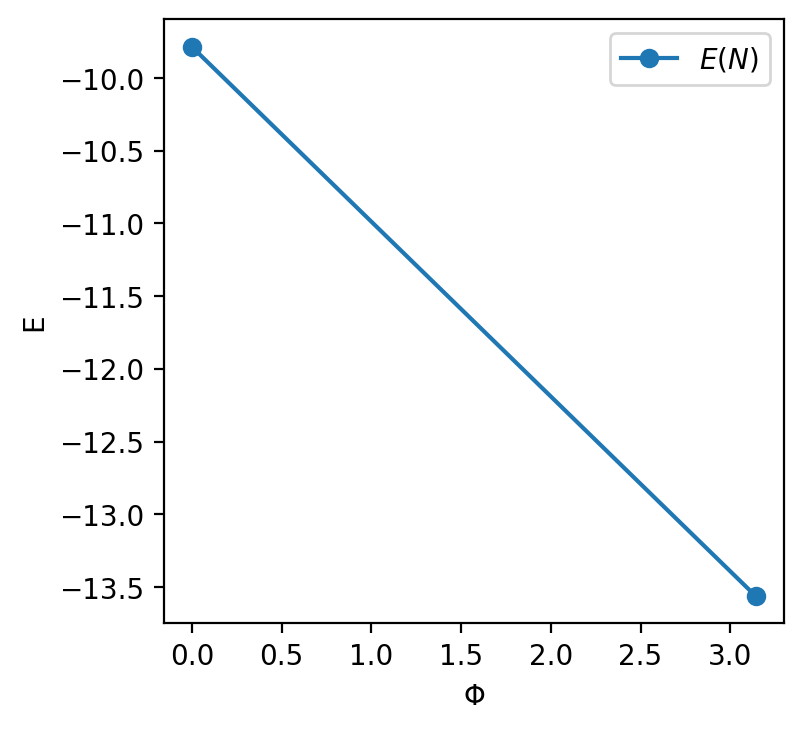

In [20]:
es_even_b = [es_peri[0,0], es_anti[0,0]]
es_odd_b = [0.5*(es_peri[0,1] + es_peri[0,2]), 0.5*(es_anti[0,1] + es_anti[0,2])]
es_even_a = [es_peri[1,0], es_anti[1,0]]
es_odd_a = [0.5*(es_peri[1,1] + es_peri[1,2]), 0.5*(es_anti[1,1] + es_anti[1,2])]
plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, np.pi], np.array(es_even_b) - np.array(es_odd_b), label=r'$E(N)$', marker='o')
# plt.plot([0, np.pi], es_odd_b, label=r'$\frac{E(N+2)+E(N-2)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_topo.png')
plt.show()

plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, np.pi], np.array(es_even_a) - np.array(es_odd_b), label=r'$E(N)$', marker='o')
# plt.plot([0, np.pi], es_odd_a, label=r'$\frac{E(N+2)+E(N-2)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_triv.png')
plt.show()

# $\rho = 1$ (half-filling)

In [21]:
Nup = 2*(l//2)
# Ndown = 6
basis = form_basis(2*l, Nup, Nup)
basis_plus = form_basis(2*l, Nup+1, Nup+1)
basis_minus = form_basis(2*l, Nup-1, Nup-1)
bases = [basis, basis_plus, basis_minus]
Gr = .7
Ghr = Gr/(2*Gr-1)
# Ghr = 2
Gs = [Gr*Gc, Ghr*Gc]
print('G/Gc')
print(Gr)
print(Ghr)
es_peri = np.zeros((2, 3))
es_anti = np.zeros((2, 3))
Grs = []
for i, G in enumerate(Gs):
    Gr = np.round(G/Gc, 1)
    Grs += [Gr]
    for j, b in enumerate(bases):
        print('How many states?')
        print(b.Ns)
        h_peri = periodic_ham(l, G, b)
        h_anti = ham_op_2(l, G, k_pos, b)
        ep, _ = h_peri.eigsh(k=10, which='SA')
        ea, _ = h_anti.eigsh(k=10, which='SA')
        es_peri[i,j] = min(ep)
        es_anti[i,j] = min(ea)

G/Gc
0.7
1.7500000000000002
How many states?
4900
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
3136
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
3136
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
4900
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
3136
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Ho

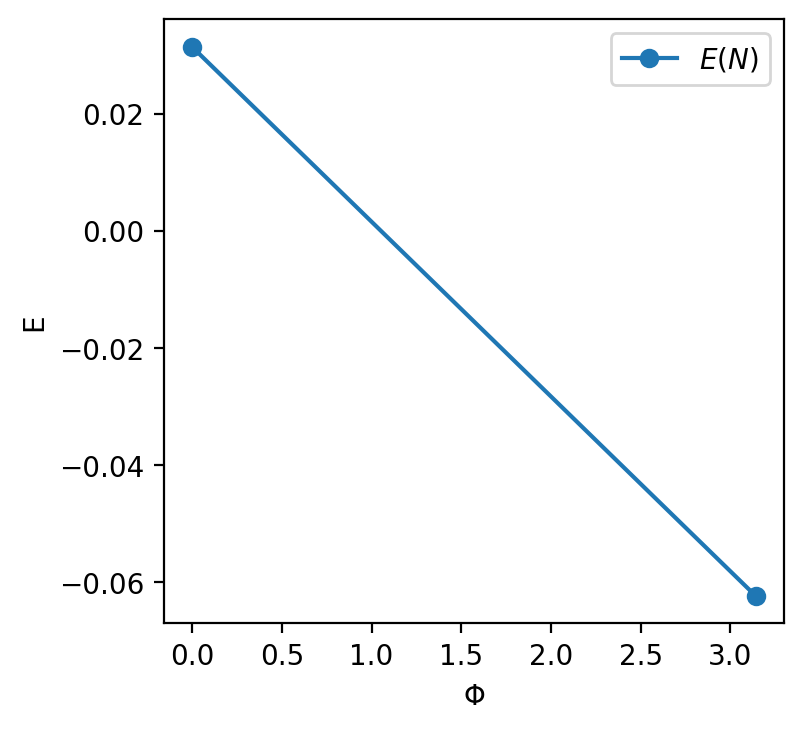

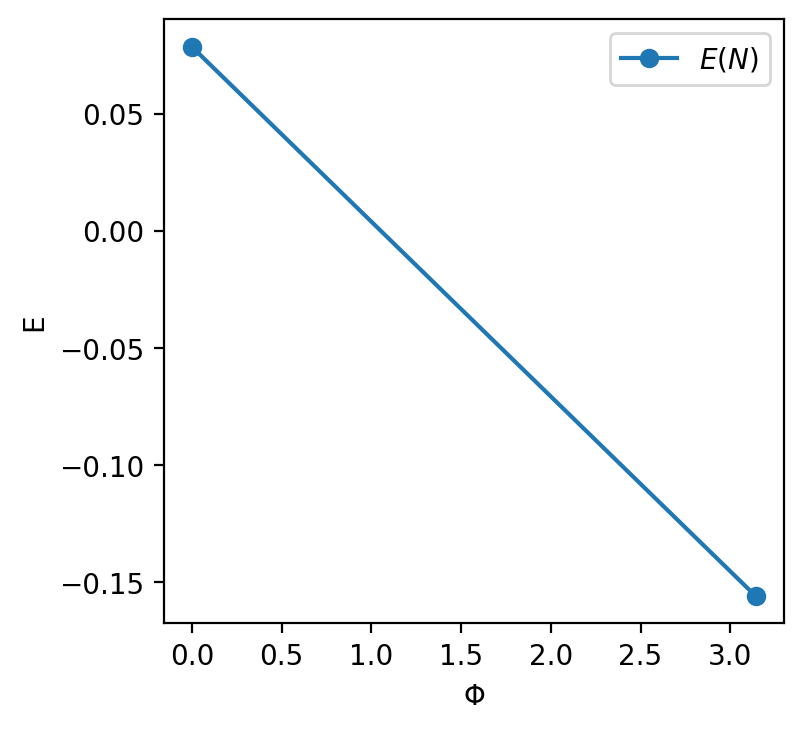

In [22]:
es_even_b = [es_peri[0,0], es_anti[0,0]]
es_odd_b = [0.5*(es_peri[0,1] + es_peri[0,2]), 0.5*(es_anti[0,1] + es_anti[0,2])]
es_even_a = [es_peri[1,0], es_anti[1,0]]
es_odd_a = [0.5*(es_peri[1,1] + es_peri[1,2]), 0.5*(es_anti[1,1] + es_anti[1,2])]
plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, np.pi], np.array(es_even_b)-np.array(es_odd_b), label=r'$E(N)$', marker='o')
# plt.plot([0, np.pi], es_odd_b, label=r'$\frac{E(N+2)+E(N-2)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_topo.png')
plt.show()

plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, np.pi], np.array(es_even_a) - np.array(es_odd_a), label=r'$E(N)$', marker='o')
# plt.plot([0, np.pi], es_odd_a, label=r'$\frac{E(N+2)+E(N-2)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_triv.png')
plt.show()

# $\rho = 1.5$ (3/4 filling)

In [23]:
Nup = 3*(l//2)
# Ndown = 6
basis = form_basis(2*l, Nup, Nup)
basis_plus = form_basis(2*l, Nup+1, Nup+1)
basis_minus = form_basis(2*l, Nup-1, Nup-1)
bases = [basis, basis_plus, basis_minus]
Gr = .7
Ghr = Gr/(2*Gr-1)
# Ghr = 2
Gs = [Gr*Gc, Ghr*Gc]
print('G/Gc')
print(Gr)
print(Ghr)
es_peri = np.zeros((2, 3))
es_anti = np.zeros((2, 3))
Grs = []
for i, G in enumerate(Gs):
    Gr = np.round(G/Gc, 1)
    Grs += [Gr]
    for j, b in enumerate(bases):
        print('How many states?')
        print(b.Ns)
        h_peri = periodic_ham(l, G, b)
        h_anti = ham_op_2(l, G, k_pos, b)
        ep, _ = h_peri.eigsh(k=10, which='SA')
        ea, _ = h_anti.eigsh(k=10, which='SA')
        es_peri[i,j] = min(ep)
        es_anti[i,j] = min(ea)

G/Gc
0.7
1.7500000000000002
How many states?
784
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
64
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
3136
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
784
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many states?
64
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
How many

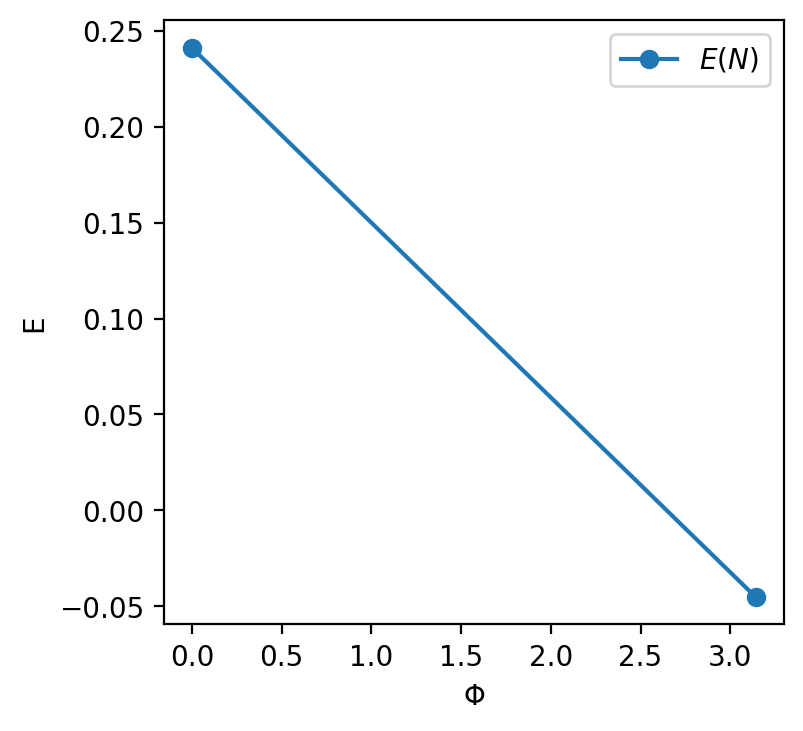

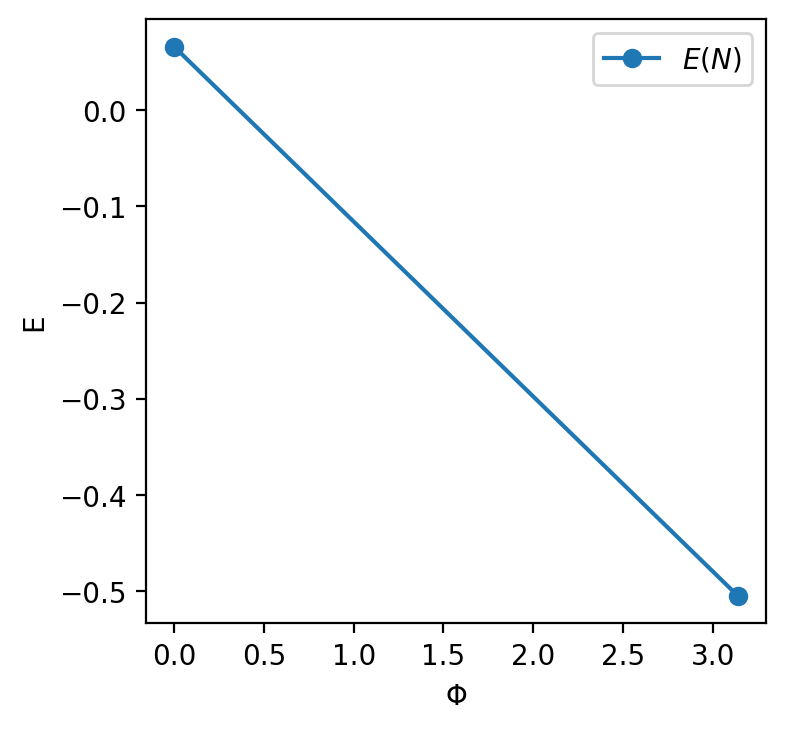

In [24]:
es_even_b = [es_peri[0,0], es_anti[0,0]]
es_odd_b = [0.5*(es_peri[0,1] + es_peri[0,2]), 0.5*(es_anti[0,1] + es_anti[0,2])]
es_even_a = [es_peri[1,0], es_anti[1,0]]
es_odd_a = [0.5*(es_peri[1,1] + es_peri[1,2]), 0.5*(es_anti[1,1] + es_anti[1,2])]
plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, np.pi], np.array(es_even_b) - np.array(es_odd_b), label=r'$E(N)$', marker='o')
# plt.plot([0, np.pi], es_odd_b, label=r'$\frac{E(N+1)+E(N-1)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_topo.png')
plt.show()

plt.figure(figsize=(4,4), dpi=200)
plt.plot([0, np.pi], np.array(es_even_a) - np.array(es_odd_a), label=r'$E(N)$', marker='o')
# plt.plot([0, np.pi], es_odd_a, label=r'$\frac{E(N+1)+E(N-1)}{2}$', ls=':', marker='o')
plt.ylabel('E')
plt.legend()
plt.xlabel(r'$\Phi$')
plt.savefig('fermion_parity_triv.png')
plt.show()